In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the following codes are derived from https://gist.github.com/akesling/5358964
def read(dataset = "training", path = "."):
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError

    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return lbl, img

In [3]:
def plot_images(image_list):
    L = len(image_list)
    
    for i in range(L):
        plt.imshow(image_list[i], cmap=plt.cm.gray_r)
        plt.show()

In [4]:
lbls, imgs = read(dataset="training", path="../data/")

In [5]:
def pooling(imgs, num_imgs, type_):
    pooled_images = []
    
    if type_ is "max":
        for i in range(num_imgs):
            ori_image = imgs[i] # ori_image is the original image in imgs
            m, n = ori_image.shape
            pooled_image = np.zeros([m // 2, n // 2])
            
            for row in range(0, m, 2):
                for col in range(0, n, 2):
                    pooled_image[row // 2, col // 2] = np.amax(ori_image[row:row+2, col:col+2]) 
            pooled_images.append(pooled_image)
    elif type_ is "average":
        for i in range(num_imgs):
            ori_image = imgs[i] # ori_image is the original image in imgs
            m, n = ori_image.shape
            pooled_image = np.zeros([m // 2, n // 2])
            
            for row in range(0, m, 2):
                for col in range(0, n, 2):
                    pooled_image[row // 2, col // 2] = np.mean(ori_image[row:row+2, col:col+2]) 
            pooled_images.append(pooled_image)
    else:
        raise ValueError("Argument type_ should be either max or average!")
    
    return pooled_images

## 1. Performing Max Pooling on the First Five Images in Training Dataset

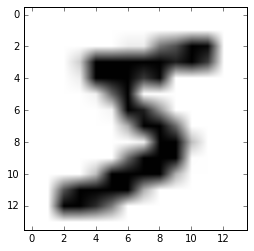

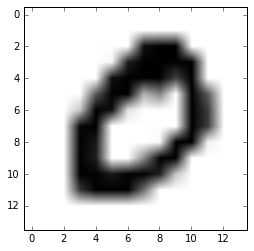

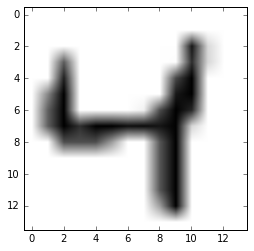

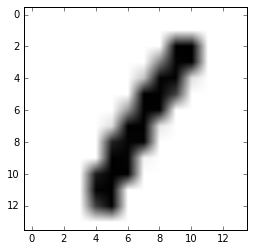

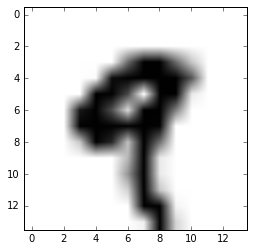

In [6]:
plot_images(pooling(imgs=imgs, num_imgs=5, type_="max"))

## 2. Performing Average Pooling on the First Five Images in Training Dataset

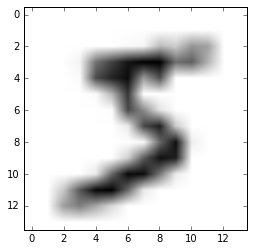

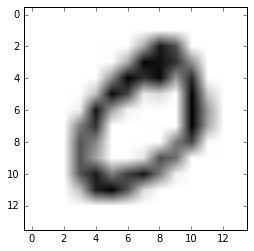

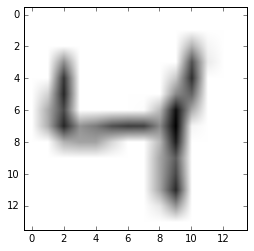

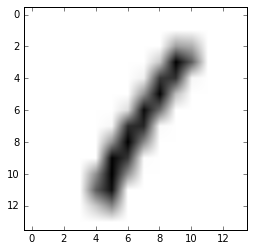

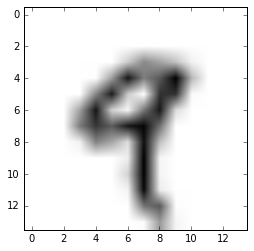

In [7]:
plot_images(pooling(imgs=imgs, num_imgs=5, type_="average"))